In [42]:
import Pkg; Pkg.activate(joinpath(@__DIR__, "../../../../../"))
using Distributions
using PyPlot

Activating environment at `~/repo/CytofRepFAM.jl/Project.toml`


In [82]:
"""
Paper: Bayesian inference for finite mixtures of univariate and multivariate
       skew-normal and skew-t distributions, Biostatistics 2010.
skew (delta): a real number in (-1, 1)
"""
function rand_skewnormal(loc, scale, skew)
    z = rand(TruncatedNormal(0, 1, 0, Inf))
    return loc + scale * skew * z + scale * sqrt(1 - skew ^ 2) * randn()
end

function rand_skewnormal(loc, scale, skew, dims...)
    z = rand(TruncatedNormal(0, 1, 0, Inf), dims...)
    return loc .+ scale * skew * z + scale * sqrt(1 - skew ^ 2) * randn(dims...)
end

rand_skewnormal (generic function with 2 methods)

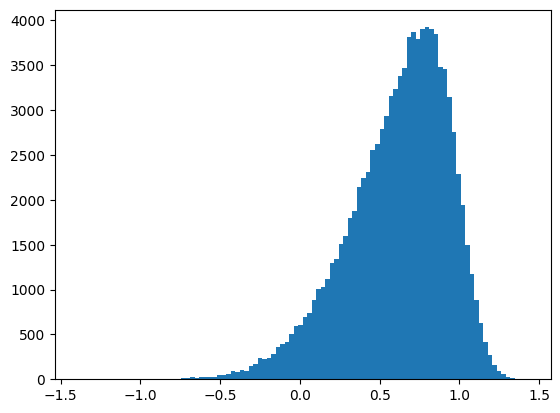

In [113]:
x = rand_skewnormal(1, .5, -.97, 100000)
plt.hist(x, bins=100);

In [112]:
mean(x .< 0)

0.04467

In [114]:
mean(x), std(x)

(0.6135805222061224, 0.31532906281968076)